# California Wildfire – Fire Damage Detection & Analysis

**Goal:** Predict building fire damage status using location (X/Y) and structure type.

**Sections:** Read Data → Cleaning → Visualization → Encoding → Modeling (Random Forest baseline)

> To run locally: `pip install -r requirements.txt` and run cells top-to-bottom.


### **CONTENT:**

1. [Read Data](#1)
2. [Data Cleaning](#2)
3. [Data Visualization](#3)
4. [Data Encoder](#4)
5. [Modeling](#5)

<a id="1"></a> <br>
> ## **1. Read Data**

1. X: X-coordinate representing the geographical location of the structure.

2. Y: Y-coordinate representing the geographical location of the structure.

3. OBJECTID: A unique identifier assigned to each structure.

4. GLOBALID: A global (unique) identifier assigned to each structure.

5. DAMAGE: Damage level categorized as follows:
   0: Unaffected (0%).
   1: Slightly affected (1-9%).
   2: Moderately affected (10-25%).
   3: Heavily damaged (25-50%).
   4: Destroyed (>50%).

6. STRUCTURETYPE: Type of structure representing architectural features. Examples:

   Single-family residence, single-story
   Multi-family residence, multi-story


In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\user\Downloads\DINS_2025_Palisades_Public_View.csv")
df

,X,Y,OBJECTID,GLOBALID,DAMAGE,STRUCTURETYPE
0,-1.320913e+07,4.034057e+06,1,749289c2-99a6-4d08-a870-16a6e499021e,Destroyed (>50%),Single Family Residence Multi Story
1,-1.320911e+07,4.034052e+06,2,12de8e53-d11c-40c4-b628-d861d62cc061,Destroyed (>50%),Single Family Residence Multi Story
2,-1.320890e+07,4.034094e+06,4,3d521301-742c-4009-8230-cfff2f4b5125,Destroyed (>50%),Multi Family Residence Multi Story
3,-1.320880e+07,4.034014e+06,5,11e11323-9a48-41c7-9d22-12ae0f054089,Destroyed (>50%),Single Family Residence Single Story
4,-1.320873e+07,4.034004e+06,6,0023c6d1-86f7-44bb-afaa-00e36c6a9538,Destroyed (>50%),Single Family Residence Single Story
...,...,...,...,...,...,...
11934,-1.319695e+07,4.038436e+06,13318,d00ab9b7-c945-42fd-9f45-e3bb1a80f5d4,Affected (1-9%),Single Family Residence Multi Story
11935,-1.319565e+07,4.036007e+06,13336,1afc2d42-ba87-4855-a5d7-f1c1554b9ad0,Affected (1-9%),Single Family Residence Single Story
11936,-1.319559e+07,4.035946e+06,13337,6d788ce6-dfed-4e6f-90ff-95466fbc0e72,Affected (1-9%),Single Family Residence Single Story
11937,-1.320412e+07,4.038301e+06,13341,7bdd912e-56f3-4865-9423-f6d7cb892ef2,Minor (10-25%),Single Family Residence Multi Story


In [2]:
data=df

 <a id="2"></a><br>
> ## **2. Data Cleaning**

In [3]:
data.describe()

,X,Y,OBJECTID
count,1.193900e+04,1.193900e+04,11939.000000
mean,-1.319742e+07,4.035631e+06,6808.955356
std,4.473364e+03,1.873314e+03,3690.966766
min,-1.321205e+07,4.032804e+06,1.000000
25%,-1.319846e+07,4.034440e+06,3794.500000
50%,-1.319606e+07,4.035054e+06,6903.000000
75%,-1.319428e+07,4.036017e+06,9963.500000
max,-1.319124e+07,4.046112e+06,13353.000000


In [4]:
data.isnull().sum()

X                0
Y                0
OBJECTID         0
GLOBALID         0
DAMAGE           0
STRUCTURETYPE    0
dtype: int64

In [5]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'GLOBALID', 'DAMAGE', 'STRUCTURETYPE'], dtype='object')

In [6]:
data.dtypes

X                float64
Y                float64
OBJECTID           int64
GLOBALID          object
DAMAGE            object
STRUCTURETYPE     object
dtype: object

<a id="3"></a><br>
> ## **3. Data Visualization**

In [7]:
# Investigating the distribution of categorical variables
structure_distribution = df['STRUCTURETYPE'].value_counts()
damage_distribution = df['DAMAGE'].value_counts()

print("Structure Type Distribution:\n", structure_distribution)
print("\nDamage Distribution:\n", damage_distribution)

Structure Type Distribution:
 STRUCTURETYPE
Single Family Residence Multi Story     5312
Single Family Residence Single Story    3670
Utility Misc Structure                  1741
Multi Family Residence Multi Story       401
Mobile Home Double Wide                  240
Commercial Building Single Story         156
Mobile Home Single Wide                  108
School                                   100
Commercial Building Multi Story           75
Infrastructure                            53
Multi Family Residence Single Story       26
Motor Home                                19
Mobile Home Triple Wide                   15
Church                                    13
Mixed Commercial/Residential              10
Name: count, dtype: int64

Damage Distribution:
 DAMAGE
Destroyed (>50%)    6809
No Damage           4132
Affected (1-9%)      758
Minor (10-25%)       166
Major (26-50%)        74
Name: count, dtype: int64


In [8]:
#
numeric_summary = df.describe()
print(numeric_summary)


                  X             Y      OBJECTID
count  1.193900e+04  1.193900e+04  11939.000000
mean  -1.319742e+07  4.035631e+06   6808.955356
std    4.473364e+03  1.873314e+03   3690.966766
min   -1.321205e+07  4.032804e+06      1.000000
25%   -1.319846e+07  4.034440e+06   3794.500000
50%   -1.319606e+07  4.035054e+06   6903.000000
75%   -1.319428e+07  4.036017e+06   9963.500000
max   -1.319124e+07  4.046112e+06  13353.000000


                 X         Y  OBJECTID
X         1.000000 -0.076906  0.223046
Y        -0.076906  1.000000  0.131310
OBJECTID  0.223046  0.131310  1.000000


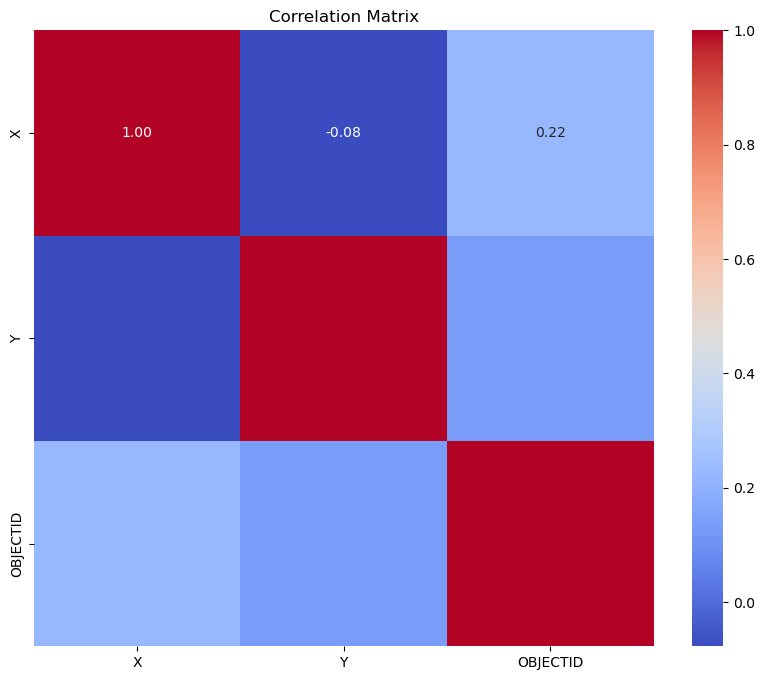

In [9]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


C:\Users\user\anaconda32\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda32\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda32\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


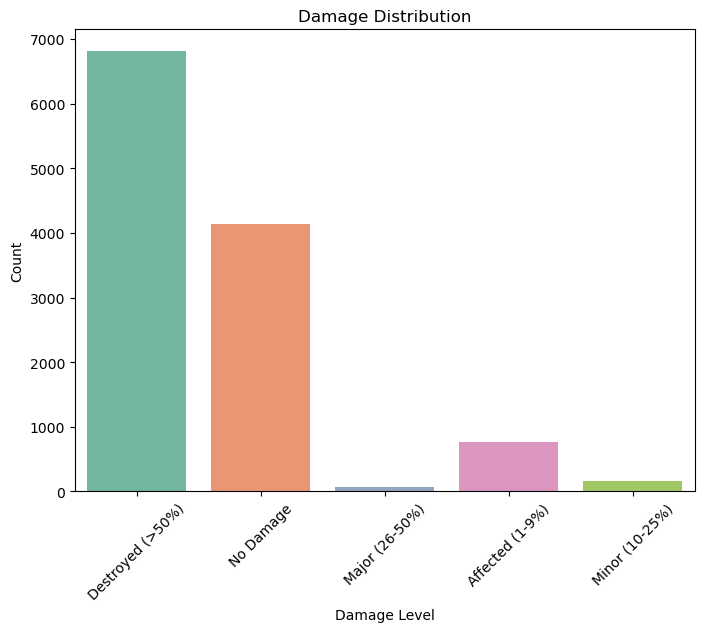

In [10]:
# Visualizing damage distribution
import warnings
plt.figure(figsize=(8, 6))
sns.countplot(x='DAMAGE', data=df, palette='Set2')
plt.title("Damage Distribution")
plt.xlabel("Damage Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.show()


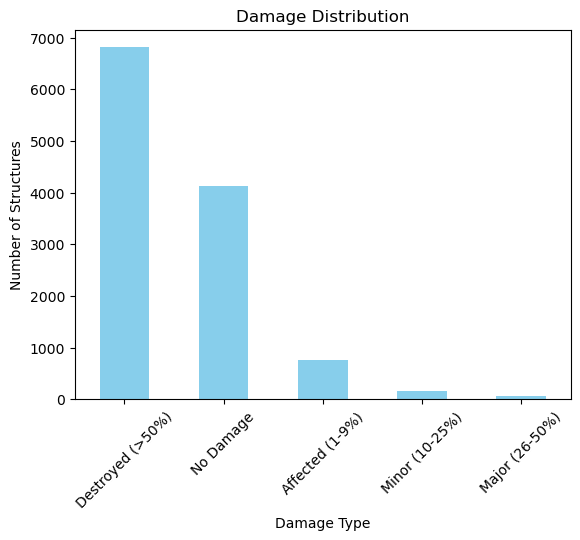

In [11]:
import matplotlib.pyplot as plt

# Count of damage types
damage_counts = df["DAMAGE"].value_counts()

# Visualization
damage_counts.plot(kind="bar", color="skyblue", title="Damage Distribution")
plt.xlabel("Damage Type")
plt.ylabel("Number of Structures")
plt.xticks(rotation=45)
plt.show()

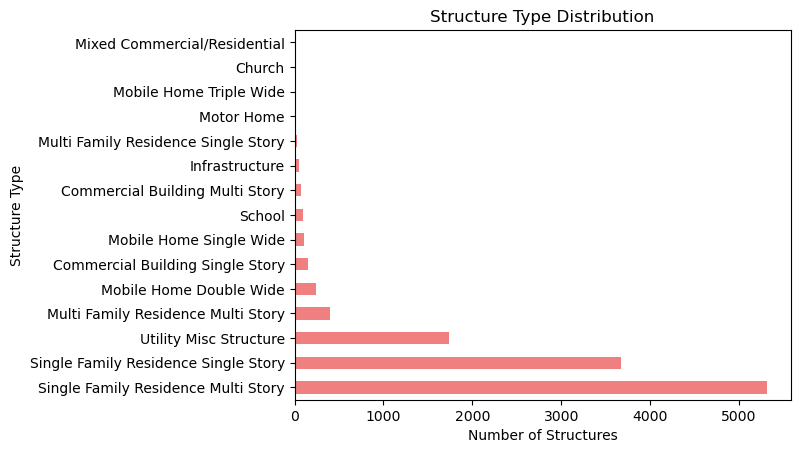

In [12]:
# Count of structure types
structure_counts = df["STRUCTURETYPE"].value_counts()

# Visualization
structure_counts.plot(kind="barh", color="lightcoral", title="Structure Type Distribution")
plt.xlabel("Number of Structures")
plt.ylabel("Structure Type")
plt.show()

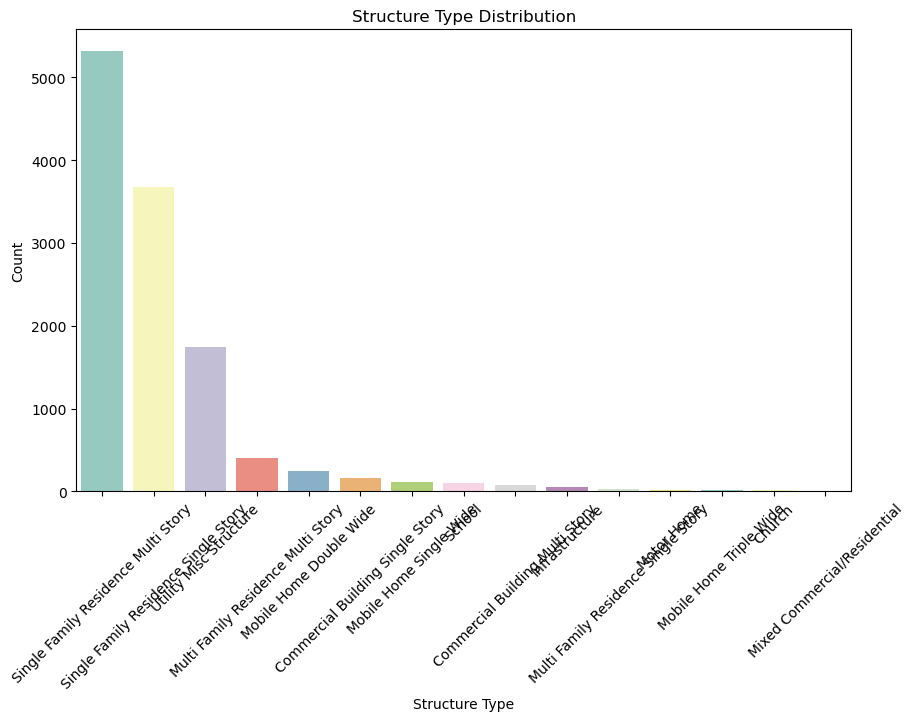

In [13]:
#Structure Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='STRUCTURETYPE', data=df, palette='Set3', order=df['STRUCTURETYPE'].value_counts().index)
plt.title("Structure Type Distribution")
plt.xlabel("Structure Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


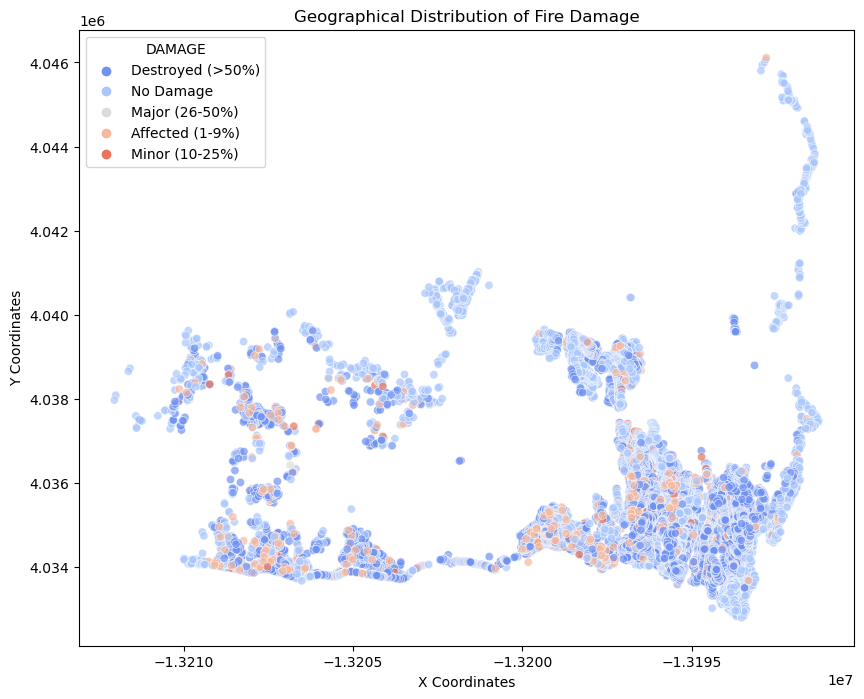

In [14]:
# # Visualizing geographical distribution (X, Y coordinates)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='DAMAGE', data=df, palette='coolwarm', alpha=0.7)
plt.title("Geographical Distribution of Fire Damage")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.show()


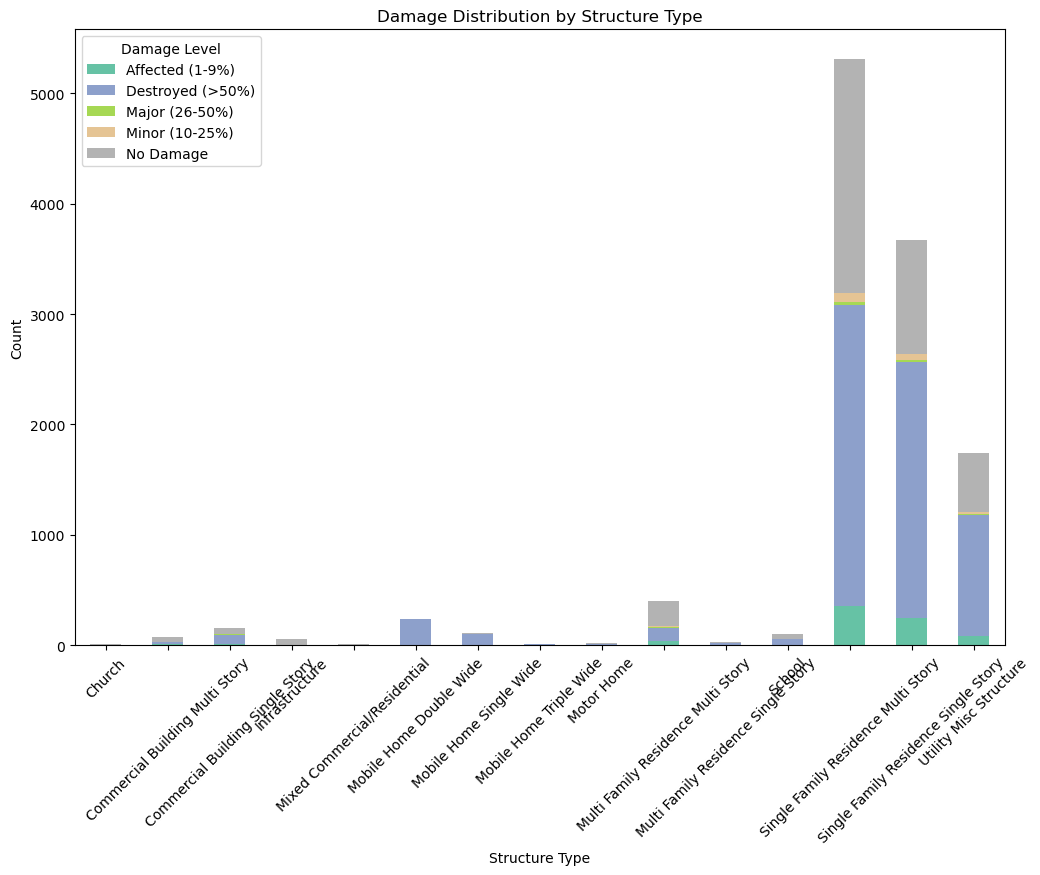

In [15]:
# Visualizing the distribution of structure type and damage status using a stacked bar chart
damage_by_structure = df.groupby(['STRUCTURETYPE', 'DAMAGE']).size().unstack()
damage_by_structure = damage_by_structure.fillna(0)

damage_by_structure.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')
plt.title("Damage Distribution by Structure Type")
plt.xlabel("Structure Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Damage Level')
plt.show()


<a id="4"></a><br>
> ## **4. Data Encoder**

In [16]:
df

,X,Y,OBJECTID,GLOBALID,DAMAGE,STRUCTURETYPE
0,-1.320913e+07,4.034057e+06,1,749289c2-99a6-4d08-a870-16a6e499021e,Destroyed (>50%),Single Family Residence Multi Story
1,-1.320911e+07,4.034052e+06,2,12de8e53-d11c-40c4-b628-d861d62cc061,Destroyed (>50%),Single Family Residence Multi Story
2,-1.320890e+07,4.034094e+06,4,3d521301-742c-4009-8230-cfff2f4b5125,Destroyed (>50%),Multi Family Residence Multi Story
3,-1.320880e+07,4.034014e+06,5,11e11323-9a48-41c7-9d22-12ae0f054089,Destroyed (>50%),Single Family Residence Single Story
4,-1.320873e+07,4.034004e+06,6,0023c6d1-86f7-44bb-afaa-00e36c6a9538,Destroyed (>50%),Single Family Residence Single Story
...,...,...,...,...,...,...
11934,-1.319695e+07,4.038436e+06,13318,d00ab9b7-c945-42fd-9f45-e3bb1a80f5d4,Affected (1-9%),Single Family Residence Multi Story
11935,-1.319565e+07,4.036007e+06,13336,1afc2d42-ba87-4855-a5d7-f1c1554b9ad0,Affected (1-9%),Single Family Residence Single Story
11936,-1.319559e+07,4.035946e+06,13337,6d788ce6-dfed-4e6f-90ff-95466fbc0e72,Affected (1-9%),Single Family Residence Single Story
11937,-1.320412e+07,4.038301e+06,13341,7bdd912e-56f3-4865-9423-f6d7cb892ef2,Minor (10-25%),Single Family Residence Multi Story


In [17]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder


df['GLOBALID'] = LabelEncoder().fit_transform(df['GLOBALID'].astype(str)) 
df['STRUCTURETYPE'] = LabelEncoder().fit_transform(df['STRUCTURETYPE'])  
df['DAMAGE'] = LabelEncoder().fit_transform(df['DAMAGE'])  


print(df.head())


              X             Y  OBJECTID  GLOBALID  DAMAGE  STRUCTURETYPE
0 -1.320913e+07  4.034057e+06         1      5439       1             12
1 -1.320911e+07  4.034052e+06         2       903       1             12
2 -1.320890e+07  4.034094e+06         4      2870       1              9
3 -1.320880e+07  4.034014e+06         5       848       1             13
4 -1.320873e+07  4.034004e+06         6         9       1             13


In [18]:
df

,X,Y,OBJECTID,GLOBALID,DAMAGE,STRUCTURETYPE
0,-1.320913e+07,4.034057e+06,1,5439,1,12
1,-1.320911e+07,4.034052e+06,2,903,1,12
2,-1.320890e+07,4.034094e+06,4,2870,1,9
3,-1.320880e+07,4.034014e+06,5,848,1,13
4,-1.320873e+07,4.034004e+06,6,9,1,13
...,...,...,...,...,...,...
11934,-1.319695e+07,4.038436e+06,13318,9672,0,12
11935,-1.319565e+07,4.036007e+06,13336,1261,0,13
11936,-1.319559e+07,4.035946e+06,13337,5110,0,13
11937,-1.320412e+07,4.038301e+06,13341,5779,3,12


                      X         Y  OBJECTID  GLOBALID    DAMAGE  STRUCTURETYPE
X              1.000000 -0.076906  0.223046  0.012158 -0.082190       0.059635
Y             -0.076906  1.000000  0.131310  0.005574  0.339096       0.044819
OBJECTID       0.223046  0.131310  1.000000  0.000648 -0.006291      -0.045907
GLOBALID       0.012158  0.005574  0.000648  1.000000 -0.002867       0.001107
DAMAGE        -0.082190  0.339096 -0.006291 -0.002867  1.000000      -0.025859
STRUCTURETYPE  0.059635  0.044819 -0.045907  0.001107 -0.025859       1.000000


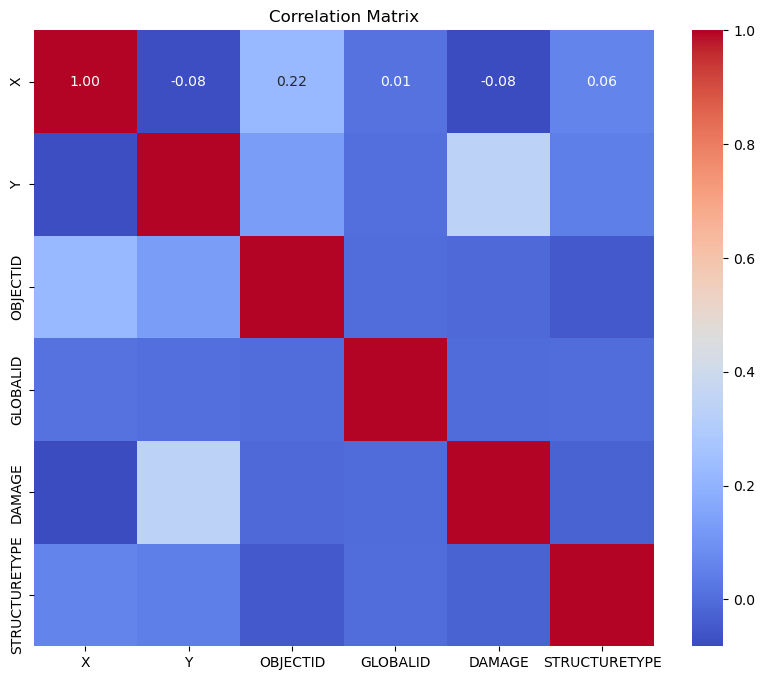

In [21]:
# Correlation matrix


correlation_matrix = df.corr()
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


<a id="5"></a><br>
> ## **5. Modeling**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# If there are categorical variables like GLOBALID, let's encode them
df['GLOBALID'] = LabelEncoder().fit_transform(df['GLOBALID'].astype(str))  # Convert GLOBALID to numeric format

# Separate features (X) and target (y) columns
X = df.drop(columns=["DAMAGE"])
y = df["DAMAGE"]  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and test data
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification Report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, test_predictions))


Training Accuracy: 0.9998952989215789
Test Accuracy: 0.7935510887772195

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.51      0.15      0.23       152
           1       0.82      0.89      0.85      1341
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        34
           4       0.77      0.80      0.78       847

    accuracy                           0.79      2388
   macro avg       0.42      0.37      0.37      2388
weighted avg       0.77      0.79      0.77      2388

